# Chapter 2: Data Manipulation với pandas


Trong chương này chúng ta sẽ thực hành một số hàm thường được sử dụng cho khoa học dữ liệu của gói **pandas** cũng như  khái niệm về DataFrame - kiểu cấu trúc và tổ chức dữ liệu được sử dụng bởi gói pandas (tương tự như Data Frame của R). 
### 1. DataFrame

DataFrame (viết tắt là DF) là một kiểu cấu trúc và tổ chức dữ liệu được bố trí thành dạng bảng gồm hàng và cột (như bảng số liệu của  Excel). Để tạo DF trước hết chúng ta cần gọi gói pandas: 


In [1]:
# Gọi gói pandas: 
import pandas as pd

Giả sử chúng ta muốn tạo ra một DF chứa thông tin về số huy chương của 3 quốc gia dẫn đầu của [Seagame 2017](https://en.wikipedia.org/wiki/2017_Southeast_Asian_Games) thì cách thức nhập  dữ liệu trực tiếp để tạo DF như sau: 

In [31]:
#=================
#     Cách 1
#=================

# Tạo ra ba chuỗi: 
quoc_gia = pd.Series(["MAS", "THA", "SGP"])
gold = pd.Series([144, 72, 58])
silver =  pd.Series([91, 86, 58])

# Hợp nhất 3 chuỗi thành DF: 
df1 = pd.DataFrame({"Nation": quoc_gia, 
                   "Gold": gold, 
                   "Silver": silver},
                   columns = ["Nation", "Gold", "Silver"])

# Xem DF tạo ra: 
df1

,Nation,Gold,Silver
0,MAS,144,91
1,THA,72,86
2,SGP,58,58


In [32]:
#================
#    Cách 2
#================

data = {"nat": ["MAS", "THA", "SGP"], 
       "gol": [144, 72, 58], 
       "sil": [91, 86, 58]}

df2 = pd.DataFrame(data, columns = ["nat", "gol",  "sil"])
df2

,nat,gol,sil
0,MAS,144,91
1,THA,72,86
2,SGP,58,58


### 2. Series

Nếu coi DF là một phân tử thì nó sẽ được tạo thành từ các nguyên tử nhỏ hơn. Với DF có tên df1 ở trên thì các nguyên tử nhỏ hơn  này là quoc_gia, gold và silver. Giới sử dụng Python gọi chúng là **Series**. Chúng ta có thể xem kiểu dữ liệu của  series bằng lệnh **type** đã biết: 

In [33]:
type(gold)

pandas.core.series.Series

Với người sử dụng R thì cấu trúc dữ liệu kiểu này tương tự vector. Do vậy chúng ta có thể áp dụng các hàm toán học cho chúng: 

In [34]:
# Tính tổng của series: 
sum(gold)

274

In [35]:
# Hay kiểm tra điều kiện logic: 
gold > 100

0     True
1    False
2    False
dtype: bool

In [36]:
# Truy cập vào từng phần tử cấu thành series: 
gold[1]

72

In [37]:
# Đếm số lượng các quốc gia có nhiều hơn 80 huy chương vàng: 
sum(gold > 80)

1

In [38]:
# Hay nhân tất cả các phần  tử với 10: 
gold*10

0    1440
1     720
2     580
dtype: int64

In [39]:
# Chiều dài của series: 
len(gold)

3

Những hiểu biết sơ bộ vừa trình bày ở trên về DataFrame và Series là rất quan trọng cho những công việc phức tạp  liên  quan đến phân tích dữ liệu sau này. 

### 3. Đọc dữ liệu định dạng .csv

Cách thức nhập dữ liệu trực tiếp mà chúng ta vừa thực hành ở trên thường sử dụng không  phổ biến Trong thực tế chúng ta thường đọc dữ liệu vào Python từ một định dạng của một phần mềm (hoặc một cơ sở dữ liệu) khác như Excel chẳng hạn. Dưới đây là một ví dụ về đọc file dữ liệu có tên *educ_Data.csv* về chi tiêu tính theo tỉ lệ %GDP của  các nước Châu Âu cho giáo dụ (dữ liệu có thể lấy [ở đây](http://www.mediafire.com/file/58t4hhpg41mgaal/educ_Data.csv)) với chú ý rằng những điểm dữ liệu trống (Missing Value) được biểu diễn bằng dấu hai chấm. Để đọc bộ dữ liệu này và chỉ định luôn ba cột biến muốn sử dụng chúng ta sử dụng hàm **pd.read_csv()** theo cách thức như sau: 


In [40]:
# Đọc dữ liệu: 
edu = pd.read_csv("E:/data_science_python/educ_data.csv", na_values = ":")
# Và xem 5 dòng đầu của DF:
edu.head()

,TIME,GEO,INDIC_ED,Value,Flag and Footnotes
0,2000,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN
1,2001,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN
2,2002,European Union (28 countries),Total public expenditure on education as % of ...,5.00,e
3,2003,European Union (28 countries),Total public expenditure on education as % of ...,5.03,e
4,2004,European Union (28 countries),Total public expenditure on education as % of ...,4.95,e


Kiểu dữ liệu là DF với thông báo là **pandas.core.frame.DataFrame** như  ta có thể thấy: 

In [41]:
# Xem kiểu cấu trúc và tổ chức dữ liệu của DF: 
type(edu)

pandas.core.frame.DataFrame

In [42]:
# Đếm số dòng - cột của DF: 
edu.shape

(384, 5)

In [43]:
# Chú ý kiểu dữ liệu tạo ra: 
a = edu.shape
type(a)

tuple

In [44]:
# Vì là một tuble nên có thể truy cập từng phần tử của nó: 
a[0] 

384

In [45]:
a[1]

5

Có thể **chỉ định một cách cụ thể** cột nào của bộ dữ liệu gốc được đọc vào Python và xem qua dữ liệu: 


In [2]:
edu = pd.read_csv("E:/data_science_python/educ_data.csv", 
                  na_values = ":", 
                  usecols = ["TIME", "GEO", "Value"])

edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [47]:
# Tên của các cột biến: 
list(edu)

['TIME', 'GEO', 'Value']

In [48]:
# Nên xem xét chi tiết hơn và nó là một list: 
b = list(edu)
type(b)

list

In [49]:
# Là list nên có thể truy cập từng phần tử theo vị trí: 
b[0]

'TIME'

###  4. Biến  đổi dữ liệu

Trong mụcnày chúng ta sẽ nghiên cứu một số hàm quan trọng cho Data Manipulation / Wrangling (tạm dịch là biến đổi dữ liệu) thường được sử dụng khi phân tích dữ liệu. 

####  4.1Trích một hay nhiều cột

Chúng ta sử dụng dấu **[]** để trích ra một hay một số cột của DF gốc: 


In [50]:
# Trích ra cột Value (kết quả là một series): 
s1 = edu["Value"]
# Xem 5 quan sát đầu: 
s1.head()

0     NaN
1     NaN
2    5.00
3    5.03
4    4.95
Name: Value, dtype: float64

In [51]:
# Trích ra hai cột (đây lại là một DF): 
s2 = edu[["Value", "TIME"]]
s2.head()

,Value,TIME
0,NaN,2000
1,NaN,2001
2,5.00,2002
3,5.03,2003
4,4.95,2004


In [52]:
# Có thể kiêm tra lại, ví dụ, nhận định rằng s2 là một DF: 
type(s2)

pandas.core.frame.DataFrame

In [53]:
# Còn s1 lại là series: 
type(s1)

pandas.core.series.Series

In [54]:
# Đối với cột biến định tính: 
edu["GEO"].head()

0    European Union (28 countries)
1    European Union (28 countries)
2    European Union (28 countries)
3    European Union (28 countries)
4    European Union (28 countries)
Name: GEO, dtype: object

Có thể thấy rằng cách thức tư duy của pandas mà cụ thể là dấu chấm ở đây tương tự  như **toán tử pipe (%>%)** mà chúng ta đã biết đối với những người sử dụng R. Thực vậy, edu["GEO"] là nguyên liệu đầu vào còn dấu . có nghĩa là *kế đến là* liệt kê 5 phần tử đầu tiên của nguyên liệu đầu vào được chọn. 

#### 4.2 Trích ra một  số dòng

In [55]:
# Trích ra dòng từ 10 đến 13: 
df2 = edu[10:13]
df2

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91


#### 4.3 Trích ra vừa dòng vừa cột: 

In [57]:
# Lấy ra các dòng từ 2 đến 5, cột Value và TIME: 
edu.ix[2:5, ["Value", "TIME"]]


,Value,TIME
2,5.00,2002
3,5.03,2003
4,4.95,2004
5,4.92,2005


In [58]:
# Lấy các quan sát ở dòng 0, 2, 6, 19 ở cột GEO: 
edu.ix[[0, 2, 6, 19], "GEO"]

0     European Union (28 countries)
2     European Union (28 countries)
6     European Union (28 countries)
19    European Union (27 countries)
Name: GEO, dtype: object

In [59]:
# Tương tự: 
edu.ix[[4, 6, 10], ["Value", "TIME"]]

,Value,TIME
4,4.95,2004
6,4.91,2006
10,5.41,2010


In [60]:
# Lấy ra ngẫu nhiên không hoàn lại 2 quan sát từ df1: 
df1.sample(2, replace = False)

,Nation,Gold,Silver
2,SGP,58,58
0,MAS,144,91


Tất nhiên kết quả của bạn có thể khác. Và thực hiện  lại câu lệnh kết quả cũng khác. Để cố định kết quả chúng ta sử dụng lệnh gieo hạt. Lấy ví dụ với edu: 

In [61]:
# Lấy ra 10 quan sát của  edu: 
edu.sample(10, random_state = 9)

,TIME,GEO,Value
105,2009,Bulgaria,4.58
282,2006,Malta,6.45
235,2007,Latvia,5.07
162,2006,Ireland,4.73
294,2006,Netherlands,5.50
101,2005,Bulgaria,4.25
280,2004,Malta,4.66
325,2001,Portugal,5.39
124,2004,Denmark,8.43
80,2008,Euro area (13 countries),4.94


In [62]:
# Lấy ra 50% số dòng từ edu theo cách thức chọn mẫu không hoàn lại: 
df50 = edu.sample(frac = 0.5, random_state = 9)
df50.shape

(192, 3)

Những dòng lệnh dưới đây một  lần nữa cho thấy sự tương tự giữa toán tử pipe ở R và dấu . của Python: 

In [63]:
# Vừa chọn cột, vừa lấy  ngẫu nhiên 10 quan sát: 
edu[["TIME", "Value"]].sample(10, random_state = 5)

,TIME,Value
52,2004,4.80
213,2009,4.70
139,2007,4.49
182,2002,4.25
300,2000,5.66
75,2003,5.04
49,2001,NaN
344,2008,NaN
377,2005,6.30
157,2001,4.24


In [64]:
# Vừa chọn cột, vừa lấy ngẫu nhiên 10 quan sát rồi tính mean: 
edu[["TIME", "Value"]].sample(10, random_state = 5).mean()

TIME     2004.000
Value       4.935
dtype: float64

Lưu ý rằng hàm **mean()** mà chúng ta vừa sử dụng ở trên của gói pandas tự động loại NA trước khi tính toán. Chúng ta sẽ nghiên cứu kĩ  hơn về điều này ở mục sau. 

#### 4.4 Lọc dữ liệu 

In [65]:
# Lọc ra DF mà Value lớn hơn 7 rồi coi 5 quan sát đầu: 
lon_hon7 = edu[edu["Value"] > 7]
lon_hon7.head()

,TIME,GEO,Value
120,2000,Denmark,8.28
121,2001,Denmark,8.44
122,2002,Denmark,8.44
123,2003,Denmark,8.33
124,2004,Denmark,8.43


In [66]:
# Hoặc một cách thức khác: 
edu[edu["Value"] > 7].head()

,TIME,GEO,Value
120,2000,Denmark,8.28
121,2001,Denmark,8.44
122,2002,Denmark,8.44
123,2003,Denmark,8.33
124,2004,Denmark,8.43


In [67]:
# Lọc ra những quan sát là French ở cột GEO: 
phap = edu[edu["GEO"] == "France"]

# Rồi xem qua dữ liệu: 
phap.head()


,TIME,GEO,Value
192,2000,France,6.04
193,2001,France,5.95
194,2002,France,5.90
195,2003,France,5.92
196,2004,France,5.80


In [7]:
# Các quan sát là France và Time là sau năm 2005: 
edu[(edu["GEO"] == "France") & (edu["TIME"] >= 2006)]

,TIME,GEO,Value
198,2006,France,5.61
199,2007,France,5.62
200,2008,France,5.62
201,2009,France,5.90
202,2010,France,5.86
203,2011,France,5.68


In [11]:
# Các quan sát là France hoặc Spain và Time là sau năm 2005: 
fs = edu[(edu["GEO"] == "France") | (edu["GEO"] == "Spain")]
fs[fs["TIME"] > 2005]

,TIME,GEO,Value
186,2006,Spain,4.26
187,2007,Spain,4.34
188,2008,Spain,4.62
189,2009,Spain,5.02
190,2010,Spain,4.98
191,2011,Spain,4.82
198,2006,France,5.61
199,2007,France,5.62
200,2008,France,5.62
201,2009,France,5.90


#### 4.5 Lọc dữ liệu thiếu

Dữ liệu thiếu (Missing Data) là một  vấn đề thường gặp khi xử lí dữ liệu do vậy chúng ta nên chú ý nhóm lệnh liên quan đến  dữ liệu thiếu. 


In [68]:
# Kiếm tra dữ liệu thiếu cho một series và xem 5 quan sát đầu: 
edu["Value"].isnull().head()

0     True
1     True
2    False
3    False
4    False
Name: Value, dtype: bool

In [69]:
# Tổng số NA của series này là 23: 
edu["Value"].isnull().sum()

23

In [70]:
# Kết quả 23 này có thể được tìm theo một cách khác bằng một hàm tự viết: 
def tim_na(x): 
    return(x.isnull().sum())

# Áp dụng hàm trên: 
tim_na(edu["Value"])

23

In [71]:
# Tìm số lượng NA cho các cột của DF: 
edu.apply(tim_na)

TIME      0
GEO       0
Value    23
dtype: int64

In [72]:
# Trích ra DF thiếu giá trị ở cột Value:
thieu_df = edu[edu["Value"].isnull()]
# 5 quan sát đầu:
thieu_df.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


In [73]:
# Trích ra DF mà không thiếu dữ liệu ở cột Value: 
full_df = edu.dropna(subset = ["Value"])
full_df.head()

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


Dưới đây chúng ta tạo ra một bộ dữ liệu giả có tên df với một số điểm dữ liệu trống (được tạo ra bằng np.nan) rồi thực  hiện một số thao tác lọc dữ liệu trống phức tạp hơn.  Trước hết cần gọi gói **numpy**. 

In [154]:
# Tạo DF: 
import numpy as np
df = pd.DataFrame([[np.nan, 2, np.nan, 0, 3], 
                   [3, 4, np.nan, 1, 2], 
                   [2, 3, np.nan, 2, 1], 
                   [np.nan, np.nan, np.nan, 5, 5]], 

                  columns=list("ABCDE"))
df

,A,B,C,D,E
0,NaN,2.0,NaN,0,3
1,3.0,4.0,NaN,1,2
2,2.0,3.0,NaN,2,1
3,NaN,NaN,NaN,5,5


In [121]:
# Xóa đi cột nào mà tất cả là NA: 
df.dropna(how = "all", axis = 1)

,A,B,D,E
0,NaN,2.0,0,3
1,3.0,4.0,1,2
2,2.0,3.0,2,1
3,NaN,NaN,5,5


In [122]:
# Xóa bất cứ cột nào mà có ít nhất từ 1 NA trở lên: 
df.dropna(how = "any", axis = 1)

,D,E
0,0,3
1,1,2
2,2,1
3,5,5


In [123]:
# Xóa đi dòng nào có ít nhất một NA: 
df.dropna(axis = 0, how = "any")

,A,B,C,D,E


In [126]:
# Giữ lại những dòng nào có từ 3 điểm dữ liệu không trống trở lên: 
df.dropna(thresh = 3)

,A,B,C,D,E
0,NaN,2.0,NaN,0,3
1,3.0,4.0,NaN,1,2
2,2.0,3.0,NaN,2,1


#### 3.6 Sắp xếp lại dữ DF theo chiều tăng - giảm

In [74]:
# Sắp xếp theo chiều giảm dần của cột Value: 
df_giam = edu.sort_values(by = "Value", ascending = False)
df_giam.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44


In [75]:
# Nếu là biến định tính, character thì sẽ sắp xếp thứ tự của bảng chữ cái: 
by_nation = edu.sort_values(by = "GEO")
by_nation.head(10)

,TIME,GEO,Value
300,2000,Austria,5.66
309,2009,Austria,5.98
308,2008,Austria,5.47
307,2007,Austria,5.33
306,2006,Austria,5.40
305,2005,Austria,5.44
304,2004,Austria,5.48
303,2003,Austria,5.53
302,2002,Austria,5.68
301,2001,Austria,5.74


### 5. Hàm tính toán  một  số thống kê chủ yếu

Dưới đây là một số hàm tính toán các thống kê thường sử dụng khi phân tích dữ liệu: 

| Hàm  | Chức năng | 
|-----------|-------------|
| count()   |Number of non-null observations|  
| sum()     |Sum of values|
| mean()    |Mean of values            | 
| median()  |Arithmetic median of values             |
| min()     |Minimum|
| max()     |Maximum|
| prod()    |Product of values|
| std()     |Unbiased standard deviation|
| var()     | Unbiased variance|


Lưu ý rằng các hàm của pandas sẽ mặc định **loại bỏ bất kì NA nào trước khi tính toán** như chúng ta có thể kiểm tra: 



In [76]:
# Sử dụng hàm của pandas tính max:
edu["Value"].max()

8.8100000000000005

In [77]:
# Nhưng nếu dùng hàm mean() mặc định thì kết quả là không xác định (nan): 
max(edu["Value"])

nan

In [78]:
# Tính mean: 
edu["Value"].mean()

5.203988919667592

In [79]:
# Không những thế các hàm của pandas còn áp dụng cho các cột biến định lượng: 
edu.mean()

TIME     2005.500000
Value       5.203989
dtype: float64

In [12]:
# Tính toán các thống kê thường gặp: 
edu.describe()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


### 6. Tính  toán  các thống  kê theo nhóm

In [14]:
# Tính những thống kê thường gặp theo nhóm và xem 5 quan sát đầu: 
edu[["GEO", "Value"]].groupby("GEO").describe().head()

Value                                                       
               count      mean       std   min     25%    50%     75%   max
GEO                                                                        
Austria         12.0  5.618333  0.209060  5.33  5.4625  5.595  5.7550  5.98
Belgium         11.0  6.189091  0.278081  5.92  5.9850  6.020  6.4900  6.58
Bulgaria        12.0  4.093333  0.273440  3.70  3.8800  4.065  4.2875  4.58
Cyprus          12.0  7.023333  0.777623  5.42  6.7275  6.985  7.5550  7.98
Czech Republic  12.0  4.168333  0.213747  3.83  4.0200  4.175  4.3300  4.51

In [24]:
# Tính các thống kê thường gặp áp dụng cho cột: 
edu.describe()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


In [80]:
# Tính mean theo nhóm GEO. Chú ý kết quả là một DF:  
df_by_mean = edu[["GEO", "Value"]].groupby("GEO").mean()

# Xem qua DF này: 
df_by_mean.shape


(32, 1)

In [81]:
# Một số quan sát đầu: 
df_by_mean.head()

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333


In [82]:
# Hay tính median: 
edu[["Value", "GEO"]].groupby("GEO").median().head()

,Value
GEO,
Austria,5.595
Belgium,6.020
Bulgaria,4.065
Cyprus,6.985
Czech Republic,4.175


In [22]:
# Tính mean theo nhóm quốc gia cho Value: 
df10 = edu[["Value", "GEO"]].groupby("GEO").mean()
# Sản phẩm trả về là một DF nên chúng ta lại có thể sử dụng các hàm của pandas cho DF này: 
type(df10)

pandas.core.frame.DataFrame

In [23]:
# Và xem một số quan sát đầu của df10:  
df10.head()

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333


In [84]:
# Lấy một cột ra và chia cho 100: 
s = edu["Value"] / 100
s.head()

0       NaN
1       NaN
2    0.0500
3    0.0503
4    0.0495
Name: Value, dtype: float64

Áp dụng hàm tính căn bậc 2 cho từng phần tử của cột Value: 

In [85]:
# Gọi gói numpy: 
import numpy as np
s = edu["Value"].apply(np.sqrt)
s.head()

0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64



Nếu cần áp dụng  một hàm vô danh (in-line function) - còn  gọi  là $\lambda$-function thì: 

In [86]:
s = edu["Value"].apply(lambda x: x**2 - 1)
s.head()

0        NaN
1        NaN
2    24.0000
3    24.3009
4    23.5025
Name: Value, dtype: float64

### 7. Thêm - bớt dòng / cột cho DF đã có



Tạo một cột biến mới có tên **ValueNorm** theo cách thức lấy từng phần tử của cột Value chia cho giá trị lớn nhất của series này:  

In [87]:
edu["ValueNorm"] = edu["Value"] / edu["Value"].max()
edu.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


Xóa cột biến vừa  tạo ra và không tạo một bản sao mới của edu với lựa chọn **inplace = True**: 

In [88]:
edu.drop("ValueNorm", axis = 1, inplace = True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


Bổ sung thêm một quan sát vào dòng cuối cùng (thứ 383) là Việt Nam chẳng hạn:  

In [89]:
edu = edu.append({"TIME": 2000, 
                  "Value": 5, 
                  "GEO": "Vietnam"}, ignore_index = True)
edu.tail()

,TIME,GEO,Value
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2000,Vietnam,5.00


Muốn xóa quan sát vừa bổ sung này: 

In [90]:
edu.drop(max(edu.index), axis = 0, inplace = True)
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


Thay thế các NA bằng 0  chẳng hạn: 

In [91]:
eduFilled = edu.fillna(value={"Value": 0})
eduFilled.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),0.00
1,2001,European Union (28 countries),0.00
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


### 8. Tái bố  trí lại dữ  liệu


Chúng ta có thể tái bố trí lại dữ liệu đã có ở một dạng thường gặp khác là bảng Pivot với hàm **pivot_tabel()**: 

In [92]:
# Lọc ra các quan sát từ năm 2006 trở đi: 
filtered_data = edu[edu["TIME"] > 2005]
# Tạo Pivot table: 
pivedu = pd.pivot_table(filtered_data, 
                        values = "Value",
                        index = ["GEO"], 
                        columns = ["TIME"])
pivedu.head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


In [93]:
# Chú ý rằng pivotedu vẫn là DF: 
type(pivedu)

pandas.core.frame.DataFrame

Nên chúng ta lại có thể áp dụng các hàm đã biết cho DF này: 

In [95]:
pivedu.ix[["Spain", "France"], [2006, 2011]]

TIME,2006,2011
GEO,,
Spain,4.26,4.82
France,5.61,5.68


### 9. Xếp hạng

Để loại bỏ một số quan sát sử dụng hàm **drop()**, để đổi nhãn cho một quan sát dùng hàm **rename()**, để loại bỏ bất kì dòng nào có NA sử dụng hàm **dropna()**: 

In [96]:
# Loại bỏ một số giả quốc gia: 
pivedu = pivedu.drop(["Euro area (13 countries)",
                      "Euro area (15 countries)",
                      "Euro area (17 countries)",
                      "Euro area (18 countries)",
                      "European Union (25 countries)",
                      "European Union (27 countries)",
                      "European Union (28 countries)"], axis = 0)
# Đổi tên cho ông Germany (until 1990 former territory of the FRG: 
pivedu = pivedu.rename(index = {"Germany (until 1990 former territory of the FRG)": "Germany"})

# Loại bỏ bất kì dòng nào có NA: 
pivedu = pivedu.dropna()
# Rồi liệt kê 5 quan sát đầu: 
pivedu.head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


Nếu chúng ta muốn xếp hạng tổng dựa theo tổng của Value (chi cho giáo dục) theo năm đồng thời xếp hạng cho quốc gia theo giá trị giảm dần đầu tiên sử dụng hàm **sum()** rồi hàm **rank()** để xếp hạng: 

In [386]:
totalSum = pivedu.sum(axis = 1)
totalSum.rank(ascending = False, method = "dense").sort_values().head()

GEO
Denmark    1.0
Cyprus     2.0
Finland    3.0
Malta      4.0
Belgium    5.0
dtype: float64

Như vậy Đan  Mạch là quốc gia đứng đầu bảng. 

###  10. Hình ảnh hóa cho DF 

DF và Series của pandas có thể được hình ảnh hóa với hàm **plot()** của gói chuyên cho đồ họa là **matplotlib** theo kiểu của phần mềm Matlab. Với Rusers thì những lệnh  dưới đây là quen thuộc và dễ hiểu: 

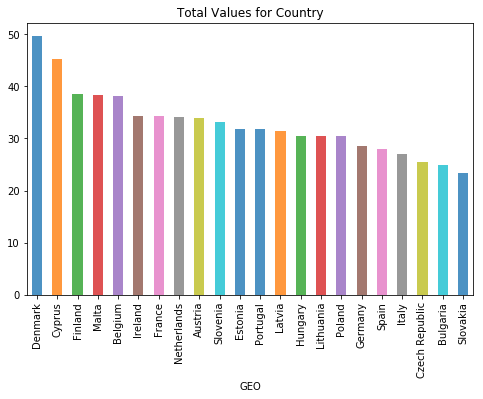

In [100]:
#  Load gói matplotlib: 
import matplotlib.pyplot as plt

# Chọn kích thước cho plot: 
fig = plt.figure(figsize = (8, 5))

# Và vẽ: 
totalSum = pivedu.sum(axis = 1).sort_values(ascending = False)
totalSum.plot(kind = "bar", 
              style = "b", 
              alpha = 0.8,
              title = "Total Values for Country")

# Hiển thị: 
plt.show()

Hoặc một kiểu Barplot phổ biến kiểu chồng lên nhau (stacked): 

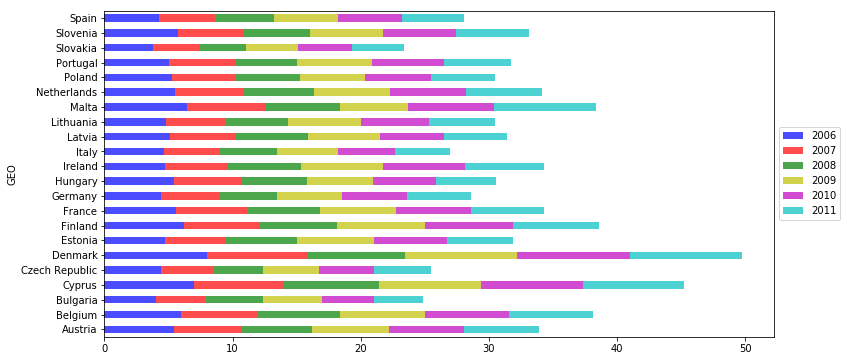

In [101]:
# Chọn màu: 
my_colors = ["b", "r", "g", "y", "m", "c"]
# Vẽ thôi: 
ax = pivedu.plot(kind = "barh", 
                 stacked = True, 
                 color = my_colors, 
                 figsize = (12, 6), 
                 alpha = 0.7)
ax.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
plt.show()

## Nguồn tham khảo thêm về pandas

Trong hầu hết các công việc thực tế thì chỉ cần master một số nhóm nhỏ các hàm cho manipulation / wrangling là đủ. Nếu bạn muốn nhiều hơn thế thì  tham khảo ở đây: 

http://pandas.pydata.org/pandas-docs/stable/

## Mini Project: Bộ dữ liệu hmeq.csv

Đây là bộ dữ liệu sử dụng cho phân các mô hình phân loại hồ sơ xin vay của khách hàng ở một tổ chức tài chính. Thông tin về bộ dữ liệu này được mô tả chi tiết (và cũng có thể download) [ở đây](http://www.creditriskanalytics.net/datasets-private.html). 

In [2]:
# Đọc vào bộ dữ liệu  này với tên credit: 
credit = pd.read_csv("F:/Python_project/python_mini_project/hmeq.csv")
# Và xem qua dữ liệu: 
credit.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [3]:
# Đánh giá số lượng dữ liệu thiếu ở từng cột dữ liệu: 
credit.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [4]:
# Sẽ hợp lí hơn nếu chúng ta xem tỉ lệ % dữ liệu thiếu: 
100*credit.isnull().sum() / len(credit.index)

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

In [5]:
# Hoặc một cách khác: 
100*(1 - credit.count() / len(credit.index))

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

In [6]:
# Số cột biến: 
len(credit.columns)

13

In [7]:
# Tỉ lệ các loại hồ sơ (cách 1):
u = credit.groupby("BAD").count()
u["LOAN"]

BAD
0    4771
1    1189
Name: LOAN, dtype: int64

In [8]:
# Tỉ lệ hồ sơ xấu (cách 2): 
100*sum(credit["BAD"] == 1) / len(credit.index)

19.949664429530202

In [9]:
# Tỉ lệ hồ sơ xấu (cách 3): 
100*pd.value_counts(credit["BAD"], sort = True) / len(credit.index)

0    80.050336
1    19.949664
Name: BAD, dtype: float64

In [10]:
# Lí do vay: 
credit["REASON"].unique()

array(['HomeImp', nan, 'DebtCon'], dtype=object)

In [11]:
# Số lần xin cấp tín dụng: 
credit["NINQ"].unique()

array([  1.,   0.,  nan,   2.,   3.,   5.,  14.,  10.,   4.,   9.,   8.,
         6.,   7.,  11.,  12.,  17.,  13.])

In [12]:
# Tương tự lệnh table() của R: 
pd.value_counts(credit["NINQ"])

0.0     2531
1.0     1339
2.0      780
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
13.0       2
12.0       2
17.0       1
14.0       1
Name: NINQ, dtype: int64

In [13]:
# Nên điều tra kĩ hơn về cấu trúc dữ liệu: 
type(pd.value_counts(credit["NINQ"]))

pandas.core.series.Series

In [14]:
# Nghề nghiệp: 
credit["JOB"].unique()

array(['Other', nan, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'], dtype=object)

In [15]:
# Đếm số tiền xin vay trung bình theo nghề và xếp theo thứ tự giảm. Có thể thấy các bố tự doanh (Self) là vay nhiều nhất
# và chính các bố này cũng là nhóm có tỉ lệ hồ sơ xấu cao thứ hai chỉ thua ông bán hàng (Sales): 

credit.groupby("JOB").mean().sort_values(by = "LOAN",  ascending = False)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
JOB,,,,,,,,,,,
Self,0.300518,28314.507772,99776.188889,149734.106383,7.069399,0.235294,0.578652,174.536225,1.357576,23.026316,35.568006
Mgr,0.233377,19155.280313,82295.007659,108628.262697,9.319372,0.337386,0.630747,174.483868,1.509116,22.885638,35.277869
ProfExe,0.166144,18983.463950,94959.637806,131118.204130,8.752345,0.184564,0.416667,197.914313,0.982843,24.503195,32.540668
Office,0.131857,18142.616034,66757.144265,94081.816756,8.350438,0.151371,0.453196,179.489207,0.931188,21.191286,34.330619
Other,0.231993,18061.683417,59337.147858,84787.503377,9.459063,0.296919,0.420613,173.520162,1.323049,19.256072,34.241852
Sales,0.348624,14913.761468,82266.181818,108449.592593,6.802020,0.444444,0.285714,195.304893,0.750000,24.880734,37.534481


In [16]:
# Có 252 ông không báo cáo vay để làm gì: 
sum(credit["REASON"].isnull())

252

In [17]:
# Có thể dán lại nhãn cho nhóm này là Unknown: 
k = credit["REASON"]

In [18]:
k = k.fillna("Unknown")

In [19]:
#  Kiểm tra lại rằng nhãn Unknown là 252: 
pd.value_counts(k)

DebtCon    3928
HomeImp    1780
Unknown     252
Name: REASON, dtype: int64

In [20]:
# Thay thế toàn bộ lại nhãn cho cột biến REASON: 
credit = credit.assign(REASON = k)
#  Xem qua: 
credit.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [21]:
# Nhóm nghề ngiệp Other là nhiều nhất: 
pd.value_counts(credit["JOB"])

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

In [22]:
# Có thể mạnh dạn thay thế NA nghề nghiệp bằng nhóm nghề xuất hiện nhiều nhất: 
credit = credit.assign(JOB = credit["JOB"].fillna("Other"))

In [23]:
# Rồi kiểm tra lại để thấy rằng 2388 + 279 = 2667: 
pd.value_counts(credit["JOB"])

Other      2667
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

In [24]:
# Tương tự là thay MORTDUE, DEBTINC và VALUE bằng mean của từng cột: 
credit = credit.assign(MORTDUE = credit["MORTDUE"].fillna(credit["MORTDUE"].mean()),
                       VALUE = credit["VALUE"].fillna(credit["VALUE"].mean()), 
                       DEBTINC = credit["DEBTINC"].fillna(credit["DEBTINC"].mean()))

In [25]:
# Kiểm tra lại: 
credit.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE        0
REASON       0
JOB          0
YOJ        515
DEROG      708
DELINQ     580
CLAGE      308
NINQ       510
CLNO       222
DEBTINC      0
dtype: int64

In [26]:
# Đến đây chúng ta tạm chấp nhận phương án rằng chỉ giữ lại các quan sát nào không có điểm dữ liệu trống và gọi là df: 
df = credit.dropna(how = "any", axis = 0)

In [27]:
# Lúc này không còn dữ liệu trống nữa: 
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [28]:
# Và có thể thấy kích thước dữ liệu đã nhỏ lại: 
df.shape

(4748, 13)

In [29]:
# So với ban đầu: 
credit.shape

(5960, 13)

In [30]:
# Có lẽ tỉ lệ các loại hồ sơ thay đổi không nhiều: 
100*sum(df["BAD"] == 1) / len(df.index)

21.10362257792755

In [31]:
# Nguyên gốc: 
100*sum(credit["BAD"] == 1) / len(credit.index)

19.949664429530202

In [32]:
# Chúng ta cũng có thể quan tâm đến việc dán lại nhãn cho BAD: 
df2 = df.assign(BAD = df["BAD"].map(lambda x: "B" if x == 1 else "G"))
df2.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,B,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,33.779915
1,B,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,33.779915
2,B,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,33.779915
4,G,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,33.779915
5,B,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614


In [33]:
# So với nguyên gốc: 
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,33.779915
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,33.779915
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,33.779915
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,33.779915
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614


### Deep Learning

In [35]:
# Load gói h2o: 
import h2o

# Chỉ định 2 nhân của bộ vi xử lí, sử dụng 6 Gi RAM: 
h2o.init(nthreads = 2, max_mem_size = 6)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 mins 31 secs
H2O cluster version:,3.16.0.2
H2O cluster version age:,13 days
H2O cluster name:,H2O_from_python_win10ls_dldeaa
H2O cluster total nodes:,1
H2O cluster free memory:,5.323 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [36]:
# Chuyển hóa về object của h2o: 
data = h2o.H2OFrame(df2)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [158]:
# Tên các cột biến: 
data.names

['BAD',
 'LOAN',
 'MORTDUE',
 'VALUE',
 'REASON',
 'JOB',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [39]:
# Chuẩn bị dữ liệu / phân  chia dữ liệu: 
y = "BAD"
x = data.names
x.remove("BAD")
train, test = data.split_frame([0.5], seed = 29)

In [40]:
# Sử dụng  mô hình  mặc định của h2o với một số options thêm để tái lập kết quả: 
m = h2o.estimators.deeplearning.H2ODeepLearningEstimator(seed = 99, reproducible = True)

# Huấn luyện mô hình với bộ dữ liệu train: 
m.train(x, y, train)

# Xem kết quả của mô hình trên train data (rất nhiều thông tin): 
m

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1513220642886_1


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.07874077762744788
RMSE: 0.28060787164199064
LogLoss: 0.27465636773538743
Mean Per-Class Error: 0.16050285490487082
AUC: 0.9171201533609548
Gini: 0.8342403067219095
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4812326599828386: 


,B,G,Error,Rate
B,306.0,209.0,0.4058,(209.0/515.0)
G,27.0,1857.0,0.0143,(27.0/1884.0)
Total,333.0,2066.0,0.0984,(236.0/2399.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4812327,0.9402532,264.0
max f2,0.2725976,0.9686919,313.0
max f0point5,0.7910943,0.9303947,168.0
max accuracy,0.5998503,0.9020425,234.0
max precision,0.9997279,1.0,0.0
max recall,0.0787629,1.0,365.0
max specificity,0.9997279,1.0,0.0
max absolute_mcc,0.5998503,0.6905397,234.0
max min_per_class_accuracy,0.8890620,0.8310680,114.0
max mean_per_class_accuracy,0.8449718,0.8394971,143.0


Gains/Lift Table: Avg response rate: 78.53 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100042,0.9996941,1.2733546,1.2733546,1.0,1.0,0.0127389,0.0127389,27.3354565,27.3354565
,2,0.0200083,0.9995388,1.2733546,1.2733546,1.0,1.0,0.0127389,0.0254777,27.3354565,27.3354565
,3,0.0300125,0.9993907,1.2733546,1.2733546,1.0,1.0,0.0127389,0.0382166,27.3354565,27.3354565
,4,0.0400167,0.9992871,1.2733546,1.2733546,1.0,1.0,0.0127389,0.0509554,27.3354565,27.3354565
,5,0.0500208,0.9991904,1.2733546,1.2733546,1.0,1.0,0.0127389,0.0636943,27.3354565,27.3354565
,6,0.1000417,0.9982047,1.2733546,1.2733546,1.0,1.0,0.0636943,0.1273885,27.3354565,27.3354565
,7,0.1500625,0.9966359,1.2733546,1.2733546,1.0,1.0,0.0636943,0.1910828,27.3354565,27.3354565
,8,0.2000834,0.9948033,1.1884643,1.2521320,0.9333333,0.9833333,0.0594480,0.2505308,18.8464260,25.2131989
,9,0.3001251,0.9898853,1.2468263,1.2503634,0.9791667,0.9819444,0.1247346,0.3752654,24.6826345,25.0363441
,10,0.4001667,0.9813111,1.2362151,1.2468263,0.9708333,0.9791667,0.1236730,0.4989384,23.6215057,24.6826345



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2017-12-14 10:08:37,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan
,2017-12-14 10:08:40,3.954 sec,796 obs/sec,1.0,1,2399.0,0.3718182,0.5119071,0.7985339,1.2202981,0.1550646
,2017-12-14 10:08:44,6.738 sec,857 obs/sec,2.0,2,4798.0,0.3813168,0.7115587,0.8553347,1.2202981,0.1521467
,2017-12-14 10:08:46,9.332 sec,906 obs/sec,3.0,3,7197.0,0.3316024,0.3820921,0.8576923,1.2733546,0.1388078
,2017-12-14 10:08:49,11.710 sec,945 obs/sec,4.0,4,9596.0,0.3111711,0.3346742,0.8828804,1.2733546,0.1254689
,2017-12-14 10:08:51,13.883 sec,986 obs/sec,5.0,5,11995.0,0.3226631,0.3742352,0.8688645,1.2733546,0.1279700
,2017-12-14 10:08:53,16.011 sec,1020 obs/sec,6.0,6,14394.0,0.3892492,0.4737158,0.8858373,1.2733546,0.1192163
,2017-12-14 10:08:55,18.126 sec,1045 obs/sec,7.0,7,16793.0,0.3295583,0.4142550,0.9037310,1.2733546,0.1167153
,2017-12-14 10:08:57,20.142 sec,1069 obs/sec,8.0,8,19192.0,0.3093510,0.3106525,0.9013378,1.2733546,0.1092122
,2017-12-14 10:08:59,22.071 sec,1095 obs/sec,9.0,9,21591.0,0.2806079,0.2746564,0.9171202,1.2733546,0.0983743


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
REASON.DebtCon,1.0,1.0,0.0755852
JOB.Other,0.8224753,0.8224753,0.0621670
JOB.Mgr,0.7663558,0.7663558,0.0579252
JOB.Self,0.7501213,0.7501213,0.0566981
JOB.Office,0.7235280,0.7235280,0.0546880
---,---,---,---
NINQ,0.6087244,0.6087244,0.0460106
CLAGE,0.5914001,0.5914001,0.0447011
CLNO,0.5574618,0.5574618,0.0421359
JOB.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [41]:
# Kết quả trên bộ dữ liệu test: 
m.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.1004883681810946
RMSE: 0.31699900343864584
LogLoss: 0.35411006790847105
Mean Per-Class Error: 0.2018187151657378
AUC: 0.8707843236721902
Gini: 0.7415686473443803
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41134914461802763: 


,B,G,Error,Rate
B,227.0,260.0,0.5339,(260.0/487.0)
G,41.0,1821.0,0.022,(41.0/1862.0)
Total,268.0,2081.0,0.1281,(301.0/2349.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4113491,0.9236622,284.0
max f2,0.0722256,0.9597891,370.0
max f0point5,0.8259796,0.9121395,147.0
max accuracy,0.4865321,0.8718604,261.0
max precision,0.9997824,1.0,0.0
max recall,0.0261401,1.0,383.0
max specificity,0.9997824,1.0,0.0
max absolute_mcc,0.6550432,0.5775467,214.0
max min_per_class_accuracy,0.9091976,0.7894737,98.0
max mean_per_class_accuracy,0.8524491,0.7981813,131.0


Gains/Lift Table: Avg response rate: 79.27 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0102171,0.9997546,1.2615467,1.2615467,1.0,1.0,0.0128894,0.0128894,26.1546724,26.1546724
,2,0.0200085,0.9994914,1.2066969,1.2347053,0.9565217,0.9787234,0.0118153,0.0247046,20.6696866,23.4705304
,3,0.0302256,0.9993846,1.2089823,1.2260102,0.9583333,0.9718310,0.0123523,0.0370569,20.8982277,22.6010197
,4,0.0400170,0.9992737,1.2615467,1.2347053,1.0,0.9787234,0.0123523,0.0494092,26.1546724,23.4705304
,5,0.0502341,0.9991198,1.2615467,1.2401646,1.0,0.9830508,0.0128894,0.0622986,26.1546724,24.0164576
,6,0.1000426,0.9982201,1.2399818,1.2400736,0.9829060,0.9829787,0.0617615,0.1240602,23.9981823,24.0073588
,7,0.1502767,0.9965976,1.2401646,1.2401040,0.9830508,0.9830028,0.0622986,0.1863588,24.0164576,24.0104003
,8,0.2000851,0.9943441,1.2076345,1.2320212,0.9572650,0.9765957,0.0601504,0.2465091,20.7634471,23.2021162
,9,0.3001277,0.9889821,1.2024956,1.2221793,0.9531915,0.9687943,0.1203008,0.3668099,20.2495601,22.2179308
,10,0.4001703,0.9794706,1.1756542,1.2105480,0.9319149,0.9595745,0.1176155,0.4844253,17.5654181,21.0548027


In [42]:
# Sử dụng mô hình cho bộ dữ liệu test: 
p = m.predict(test)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [43]:
# Xem một số kết quả ban đầu: 
ket_qua = p.as_data_frame()
ket_qua.head()

,predict,B,G
0,B,0.807410,0.192590
1,B,0.764407,0.235593
2,B,0.606726,0.393274
3,B,0.585757,0.414243
4,B,0.999829,0.000171


In [44]:
# DataFrame so sánh thực tế và dự báo: 
so_sanh = p["predict"].cbind(test["BAD"]).as_data_frame()

# Xem vài quan sát đầu: 
so_sanh.head()

,predict,BAD
0,B,B
1,B,B
2,B,B
3,B,G
4,B,B


In [45]:
# Tỉ lệ dự báo chính xác trên bộ dữ liệu test: 
(p["predict"] == test["BAD"]).mean() 

[0.8710089399744572]

In [46]:
# So sánh với tỉ lệ hồ sơ tốt (nhóm chiếm đa số): 
100*pd.value_counts(df2["BAD"], sort = True) / len(df2.index)

G    78.896377
B    21.103623
Name: BAD, dtype: float64

### Default GBM

In [47]:
#  Deafault GBM:  
m = h2o.estimators.H2OGradientBoostingEstimator(model_id = "GBM_defaults")
m.train(x, y, train)
m

gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_defaults


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.040571227919596116
RMSE: 0.20142300742367072
LogLoss: 0.15522459387726487
Mean Per-Class Error: 0.06423535959433546
AUC: 0.9843964504359656
Gini: 0.9687929008719312
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5981390212303767: 


,B,G,Error,Rate
B,435.0,80.0,0.1553,(80.0/515.0)
G,36.0,1848.0,0.0191,(36.0/1884.0)
Total,471.0,1928.0,0.0484,(116.0/2399.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5981390,0.9695698,209.0
max f2,0.3914349,0.9843881,255.0
max f0point5,0.7711726,0.9721002,154.0
max accuracy,0.5981390,0.9516465,209.0
max precision,0.9880120,1.0,0.0
max recall,0.2307523,1.0,305.0
max specificity,0.9880120,1.0,0.0
max absolute_mcc,0.5981390,0.8533447,209.0
max min_per_class_accuracy,0.7791978,0.9339806,150.0
max mean_per_class_accuracy,0.7711726,0.9357646,154.0


Gains/Lift Table: Avg response rate: 78.53 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100042,0.9858137,1.2733546,1.2733546,1.0,1.0,0.0127389,0.0127389,27.3354565,27.3354565
,2,0.0200083,0.9845895,1.2733546,1.2733546,1.0,1.0,0.0127389,0.0254777,27.3354565,27.3354565
,3,0.0304293,0.9840155,1.2733546,1.2733546,1.0,1.0,0.0132696,0.0387473,27.3354565,27.3354565
,4,0.0400167,0.9835693,1.2733546,1.2733546,1.0,1.0,0.0122081,0.0509554,27.3354565,27.3354565
,5,0.0500208,0.9827731,1.2733546,1.2733546,1.0,1.0,0.0127389,0.0636943,27.3354565,27.3354565
,6,0.1000417,0.9798375,1.2733546,1.2733546,1.0,1.0,0.0636943,0.1273885,27.3354565,27.3354565
,7,0.1500625,0.9766880,1.2733546,1.2733546,1.0,1.0,0.0636943,0.1910828,27.3354565,27.3354565
,8,0.2000834,0.9742253,1.2733546,1.2733546,1.0,1.0,0.0636943,0.2547771,27.3354565,27.3354565
,9,0.3001251,0.9679879,1.2733546,1.2733546,1.0,1.0,0.1273885,0.3821656,27.3354565,27.3354565
,10,0.4001667,0.9599888,1.2680489,1.2720282,0.9958333,0.9989583,0.1268577,0.5090234,26.8048921,27.2028154



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2017-12-14 10:09:58,0.141 sec,0.0,0.4105952,0.5200823,0.5,1.0,0.2146728
,2017-12-14 10:09:59,0.438 sec,1.0,0.3893924,0.4732968,0.8947102,1.2323843,0.1175490
,2017-12-14 10:09:59,0.500 sec,2.0,0.3730437,0.4420436,0.9224048,1.2608707,0.1042101
,2017-12-14 10:09:59,0.594 sec,3.0,0.3605568,0.4198117,0.9306155,1.2600905,0.0967070
,2017-12-14 10:09:59,0.750 sec,4.0,0.3461655,0.3944866,0.9350499,1.2600905,0.0937891
---,---,---,---,---,---,---,---,---
,2017-12-14 10:10:01,2.368 sec,46.0,0.2071988,0.1628050,0.9818796,1.2733546,0.0537724
,2017-12-14 10:10:01,2.397 sec,47.0,0.2046370,0.1596251,0.9829319,1.2733546,0.0500208
,2017-12-14 10:10:01,2.430 sec,48.0,0.2034185,0.1579991,0.9835080,1.2733546,0.0491872
,2017-12-14 10:10:01,2.486 sec,49.0,0.2028627,0.1571559,0.9837523,1.2733546,0.0487703



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
DEBTINC,648.0017700,1.0,0.4233768
DELINQ,317.8383484,0.4904899,0.2076621
CLAGE,128.9694824,0.1990264,0.0842632
DEROG,80.8761597,0.1248085,0.0528410
MORTDUE,71.2328720,0.1099270,0.0465405
LOAN,66.6709900,0.1028870,0.0435600
VALUE,52.6447411,0.0812417,0.0343958
NINQ,45.9519806,0.0709134,0.0300231
JOB,39.4466400,0.0608743,0.0257728
YOJ,39.4126587,0.0608218,0.0257506


In [48]:
# Kết quả trên bộ dữ liệu test: 
m.model_performance(test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.07497107758609432
RMSE: 0.27380846879907556
LogLoss: 0.2506858081940901
Mean Per-Class Error: 0.13241375659741905
AUC: 0.9376661071864172
Gini: 0.8753322143728344
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5618567559183194: 


,B,G,Error,Rate
B,331.0,156.0,0.3203,(156.0/487.0)
G,83.0,1779.0,0.0446,(83.0/1862.0)
Total,414.0,1935.0,0.1017,(239.0/2349.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5618568,0.9370556,225.0
max f2,0.2292295,0.9644537,316.0
max f0point5,0.7629060,0.9428603,156.0
max accuracy,0.5639232,0.8982546,224.0
max precision,0.9877673,1.0,0.0
max recall,0.0609665,1.0,374.0
max specificity,0.9877673,1.0,0.0
max absolute_mcc,0.7324119,0.6988209,170.0
max min_per_class_accuracy,0.8470038,0.8665298,122.0
max mean_per_class_accuracy,0.8127372,0.8675862,135.0


Gains/Lift Table: Avg response rate: 79.27 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0106428,0.9856489,1.2615467,1.2615467,1.0,1.0,0.0134264,0.0134264,26.1546724,26.1546724
,2,0.0200085,0.9840628,1.2615467,1.2615467,1.0,1.0,0.0118153,0.0252417,26.1546724,26.1546724
,3,0.0306513,0.9835323,1.2615467,1.2615467,1.0,1.0,0.0134264,0.0386681,26.1546724,26.1546724
,4,0.0400170,0.9828088,1.2042037,1.2481260,0.9545455,0.9893617,0.0112782,0.0499463,20.4203691,24.8126014
,5,0.0502341,0.9822219,1.2089823,1.2401646,0.9583333,0.9830508,0.0123523,0.0622986,20.8982277,24.0164576
,6,0.1000426,0.9796337,1.2615467,1.2508102,1.0,0.9914894,0.0628357,0.1251343,26.1546724,25.0810156
,7,0.1502767,0.9763098,1.2615467,1.2543992,1.0,0.9943343,0.0633727,0.1885070,26.1546724,25.4399150
,8,0.2000851,0.9732865,1.2615467,1.2561784,1.0,0.9957447,0.0628357,0.2513426,26.1546724,25.6178440
,9,0.3005534,0.9657627,1.2401646,1.2508254,0.9830508,0.9915014,0.1245972,0.3759398,24.0164576,25.0825364
,10,0.4001703,0.9568621,1.2507643,1.2508102,0.9914530,0.9914894,0.1245972,0.5005371,25.0764273,25.0810156


In [49]:
p = m.predict(test)
ket_qua = p.as_data_frame()
so_sanh = p["predict"].cbind(test["BAD"]).as_data_frame() 
(p["predict"] == test["BAD"]).mean()

gbm prediction progress: |████████████████████████████████████████████████| 100%


[0.8957002979991485]

### Tuned GBM

(To be continued...)